In [1]:
import matplotlib.pyplot as plt
from skimage.feature import hog
from skimage import data, exposure
from skimage.io import imread
from PIL import Image
from skimage.color import rgb2gray
from skimage import color
import numpy as np
import pandas as pd
import os.path 

In [2]:
class EyeAI():
    def __init__(self):
        self.image_size = 300
        
    def imageResize(self, image):
        foo = Image.open(image)
        foo = foo.resize((self.image_size,self.image_size),Image.ANTIALIAS)
        foo.save("images/resize.jpg",optimize=True,quality=95)
    
    
    def encHog(self):
        image = imread('images/resize.jpg')
        fd, hog_image = hog(image, orientations=8, pixels_per_cell=(12, 12), 
                            cells_per_block=(2, 2), visualize = True, multichannel = True)

        self.hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))
        
        print(np.array(self.hog_image_rescaled).shape)
    
    
    def plotHog(self):
        plt.imshow(self.hog_image_rescaled, cmap = "Reds")
        plt.show()
        
    
    def saveData(self, name):
        f_name = "EyeAI_DataSets.csv"
        
        data = np.array(self.hog_image_rescaled).reshape(1, 90000)
        
        if os.path.isfile(f_name): 

            df = pd.read_csv(f_name, index_col = 0) 

            latest = pd.DataFrame(data, columns = map(str, range(90000))) 
            latest["name"] = name 

            df = pd.concat((df, latest), ignore_index = True, sort = False) 

        else: 
            df = pd.DataFrame(data, columns = map(str, range(90000))) 
            df["name"] = name 

        df.to_csv(f_name)

In [3]:
300 * 300

90000

In [4]:
Alice = EyeAI()

In [5]:
Alice.imageResize("images/ren1.jpg")
Alice.encHog()
Alice.saveData("hand")

(300, 300)


In [6]:
pd.read_csv("EyeAI_DataSets.csv")

,Unnamed: 0,0,1,2,3,4,5,6,7,8,...,89991,89992,89993,89994,89995,89996,89997,89998,89999,name
0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,hand


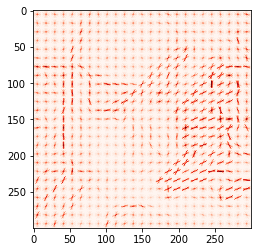

In [7]:
Alice.plotHog()